In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

In [2]:
#список
friends = ['Kate', 'Marta', 'Andrey', 'Dima', 'Asya']
len(friends)
friends.append('Albert')
friends.pop(3)
print(friends)
print('я живу с {} в общаге'.format(friends[0]))

for i in range(0,5):          #последняя цифра не включается
    print('куку', friends[i])

#словарь
friends_years = {'Kate': [19, 'Svetlograd'], 'Marta': [20,'Ekaterinburg'], 'Andrey': [19, 'Donetsk'], 
                 'Dima': [19, 'Georgievsk'], 'Asya': [20, 'Novorossiysk'], 'Albert': [22, 'Symferopol']}
friends_years['Nikita'] = [21, 'Rostov Velikiy']
friends_years['Albert'][1]

friends_years = pd.DataFrame(friends_years)

['Kate', 'Marta', 'Andrey', 'Asya', 'Albert']
я живу с Kate в общаге
куку Kate
куку Marta
куку Andrey
куку Asya
куку Albert


# Онлайн курсы

In [3]:
df = pd.read_csv('C:/Users/Yana/OneDrive - РАНХиГС/Рабочий стол/юни/прога/введение в АД/сама/lesson_1_data.csv', 
                  parse_dates = ['Дата создания'], encoding='windows-1251', sep=';')
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'])

#df.describe()
#df.info()
#df.dtypes
#df.shape
#df.replace(///) заменить на основе словаря

In [4]:
df.index
df.columns
df = df.rename(columns={'Номер': 'number', 
                   'Дата создания': 'create_date', 
                   'Дата оплаты': 'payment_date', 
                   'Title': 'tittle', 
                   'Статус': 'status',
                   'Заработано': 'money', 
                   'Город': 'city', 
                   'Платежная система': 'payment_system'})

money_by_city = df.groupby(['tittle', 'city'], as_index = False) \
                    .aggregate({'money':'sum', 'number': 'count'}) \
                    .sort_values('money', ascending = False)
display(money_by_city)

df.groupby('tittle').sum() #можно и так

#money_by_city.to_csv('money_by_city.csv', index=False) - сохраняем

money_title = df \
    .query("status == 'Завершен'") \
    .groupby(['tittle'], as_index=False) \
    .aggregate({'money': 'sum', 'number': 'count'}) \
    .sort_values('money', ascending=False) \
    .rename(columns={'number': 'success_orders'})

display(money_by_city)
display(money_title)

,tittle,city,money,number
51,Курс обучения «Эксперт»,г.Санкт-Петербург и Ленинградская область,59195.00,3
156,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,г.Москва и Московская область,46967.04,22
39,Курс обучения «Эксперт»,Балхаш,42750.00,1
95,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Краснодарский край,38169.78,15
30,Курс обучения «Специалист»,Краснодар,29695.70,1
...,...,...,...,...
63,Курс от Школы Диетологов. Повышение квалификац...,Кемерово,0.00,1
61,Курс от Школы Диетологов. Повышение квалификац...,Екатеринбург,0.00,1
55,Курс от Школы Диетологов. Бизнес,Крым Советский,0.00,1
54,Курс от Школы Диетологов. Бизнес,Киев,0.00,1


,tittle,city,money,number
51,Курс обучения «Эксперт»,г.Санкт-Петербург и Ленинградская область,59195.00,3
156,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,г.Москва и Московская область,46967.04,22
39,Курс обучения «Эксперт»,Балхаш,42750.00,1
95,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Краснодарский край,38169.78,15
30,Курс обучения «Специалист»,Краснодар,29695.70,1
...,...,...,...,...
63,Курс от Школы Диетологов. Повышение квалификац...,Кемерово,0.00,1
61,Курс от Школы Диетологов. Повышение квалификац...,Екатеринбург,0.00,1
55,Курс от Школы Диетологов. Бизнес,Крым Советский,0.00,1
54,Курс от Школы Диетологов. Бизнес,Киев,0.00,1


,tittle,money,success_orders
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20,125
0,Курс обучения «Консультант»,208163.49,31
1,Курс обучения «Специалист»,160862.64,7
2,Курс обучения «Эксперт»,148992.80,5
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92,9
3,Курс от Школы Диетологов. Бизнес,18752.54,3


In [5]:
money_title.money.sum()
str(money_title.money.sum())
float(money_title.money.sum())
int(money_title.money.sum())

992103

In [6]:
datetime.today().strftime('%Y-%m-%d')

'2022-06-15'

# Макароны

In [7]:
df = pd.read_csv('C:/Users/Yana/OneDrive - РАНХиГС/Рабочий стол/юни/прога/введение в АД/сама/lesson_3_data__1_.csv', encoding='windows-1251')[['tc', 'art_sp']]
df = df.rename(columns = {'tc': 'user_id', 'art_sp': 'brand_info'})
df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
def split_brand(stroka):
    return stroka.split(' ')[-1]

df['brand_name'] = df.brand_info.apply(split_brand)
df.brand_info.apply(lambda x: x.split(' ')[-1]) #это одно и то же
df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [9]:
df.pivot_table(index = 'user_id', columns ='brand_name', aggfunc = 'count', values='brand_info') #сводная таблица
pd.crosstab(index = df.user_id, columns= df.brand_name, 
            values = df.brand_info, aggfunc = np.count_nonzero, normalize = 'columns')

brand_name,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Brand_7,Store_Brand
user_id,,,,,,,,
-1236394515,0.000000,0.0,0.000000,0.000038,0.0,0.0,0.0,0.000000
1031,0.000000,0.0,0.000435,0.000000,0.0,0.0,0.0,0.000423
4241,0.000000,0.0,0.000000,0.000115,0.0,0.0,0.0,0.000169
17311,0.000000,0.0,0.000000,0.000076,0.0,0.0,0.0,0.000000
17312,0.000189,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000085
...,...,...,...,...,...,...,...,...
1408817589,0.000000,0.0,0.000435,0.000000,0.0,0.0,0.0,0.000169
1408825059,0.000189,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1408832719,0.000000,0.0,0.000000,0.000115,0.0,0.0,0.0,0.000000


In [10]:
users_purchases = df.groupby('user_id', as_index = False) \
                        .agg({'brand_name': 'count'}) \
                        .rename(columns = {'brand_name':'purchases'}) \
                        .query('purchases >= 5')

#df.groupby('user_id').count()[['brand_name']].reset_index() #- то же самое 

users_unique_brands = df.groupby('user_id', as_index = False).agg({'brand_name': pd.Series.nunique}) \
.rename(columns = {'brand_name':'unique_brands'})

display(users_unique_brands)

lovely_brand_purchases = df.groupby(['user_id', 'brand_name']).count().reset_index() \
                    .sort_values(['user_id', 'brand_info'], ascending = False) \
                    .groupby('user_id').head(1) \
                    .rename(columns = {'brand_name':'lovely_brand', 'brand_info': 'lb_purchases'})

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [11]:
#??pd.DataFrame.merge
loyalty_df = users_purchases.merge(users_unique_brands, on = 'user_id', how = 'inner') \
                            .merge(lovely_brand_purchases, on = 'user_id', how = 'inner')

loyal_users = loyalty_df[loyalty_df.unique_brands == 1]
loyalty_df['loyalty_score'] = loyalty_df.lb_purchases.div(loyalty_df.purchases).mul(100).round()
display(loyalty_df)


,user_id,purchases,unique_brands,lovely_brand,lb_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,83.0
1,4241,5,2,Brand_4,3,60.0
2,25971,7,2,Store_Brand,5,71.0
3,40911,27,5,Brand_4,19,70.0
4,45181,5,4,Store_Brand,2,40.0
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,100.0
3379,1408783189,10,2,Store_Brand,8,80.0
3380,1408783379,6,2,Brand_1,4,67.0
3381,1408798879,8,3,Store_Brand,4,50.0


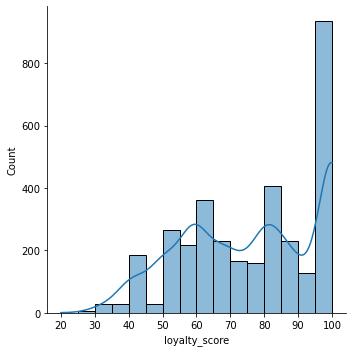

In [12]:
sns.displot(loyalty_df.loyalty_score, kde = True)

In [13]:
new = loyalty_df.groupby('lovely_brand', as_index = False).agg({'loyalty_score': 'median','user_id':'count'})

<AxesSubplot:xlabel='lovely_brand', ylabel='user_id'>

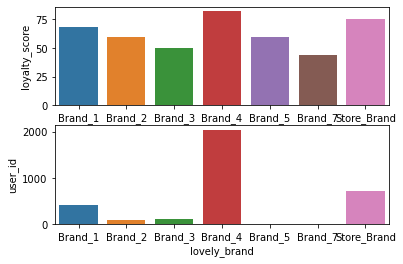

In [14]:
fig, axes = plt.subplots(2, 1)
sns.barplot(ax=axes[0], x = 'lovely_brand', y = 'loyalty_score', data = new)
sns.barplot(ax=axes[1], x = 'lovely_brand', y = 'user_id', data = new)